# DATA ANALYTICS – IBM PROJECT

### Why do workers resign from the positions they hold? Can employee attrition be  anticipated? Can companies take steps to prevent high employee turn-over?

#### Employee attrition is the reduction of staff by voluntary or involuntary reasons. These can be through natural means like retirement, or it can be through resignation, termination of contract, or when a company decides to make a position redundant. excessive involuntary attrition can be detrimental to the overall business goals, and can lead to understaffing, increased job burden on remaining employees, and harmful consequences to company reputation. 

#### You’ve just been hired by IBM to work in their Data Analytics sector. On your second day, you are given a dataset from HR that includes several records of employees that were with the company in the prior calendar year. Since the development of the dataset, some of those employees have since resigned from their positions. The company was surprised with the recent level of turnover and have tasked you with digging into the data to determine any insights about what leads to employee turnover, and alternatively, what aspects of the jobs can be protected to reduce employee turnover. 

#### Using the ‘IBM Employee Attrition’ dataset – your role is to comprehensively explore the data and generate meaningful insights into what the data is presenting. You should conclude your assignment with 3 recommendations you will make to the HR department regarding employee attrition. 

#### At the least, you should complete the following tasks: 

#### Data prep and cleaning – prior to exploring the data, you should ensure that the dataset is clean, all variables are in their proper format, and the data is free of missing, abnormal, or outlier values.  

#### Exploratory data analysis – you should explore every aspect of the data to determine the features of the data, the range of values for all variables of interest, and the relationships between variables. Exploration should be conducted outside of predictive modeling – in other words, you are not only interested in how the dependent and independent variables interact – you should also spend some time exploring variations in the data among variables (i.e. how does salary differ between genders? Does time spent in the company differ by job role?

#### Modeling – after thoroughly exploring the data, create a logistic regression model that predicts employee attrition based on the other variables availableto you. Clearly interpret your model findings. Re-run/tweak your model if you think you can find a better fit.  

#### Visualization – Create at least 3 visualizations that highlight some of the most interesting findings in your dataset. These can be findings from the regression model or any interesting relationships between variables. Good luck!

In [1]:
# import libraries
import pandas as pd
import numpy as np

import scipy.stats as stats 
import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import file
df = pd.read_excel("IBM Employee Attrition.xlsx")
### check first five records
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Data Preparation and Cleaning

In [3]:
# numbers of column and rows
df.shape

(1470, 30)

In [4]:
# check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

C(BusinessTravel) + C(OverTime) + C(Over18) + C(MaritalStatus) + C(EducationField) + C(Gender) + C(JobRole) + C(Department) + Age + DistanceFromHome + Education + EmployeeNumber + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + MonthlyIncome + NumCompaniesWorked + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear +WorkLifeBalance +YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager                                                                                       

In [5]:
# check null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
#df["Subject"].replace(["Latin", "English"], ["Latin Language Study", "English Lit"], inplace = True)

df["Attrition"].replace(["Yes","No"],["Left Position","Still Employed"], inplace = True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Left Position,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Still Employed,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Left Position,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Still Employed,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Still Employed,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking Outliner

### Check outliner for monthly income

In [8]:
## Calculate quartiles
q1 = df["MonthlyIncome"].quantile(.25)
q3 = df["MonthlyIncome"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

Q1: 2911.0
Q3: 8379.0


In [9]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

IQR: 5468.0


In [10]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

Upper Limit: 16581.0
Lower Limit: -5291.0


In [11]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['MonthlyIncome'] > top) | (df['MonthlyIncome'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

INDEX VALUES: Int64Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
            ...
            1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
           dtype='int64', length=114)


In [12]:
## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

(1356, 30)


### Check outliner for age

In [13]:
## Calculate quartiles
q1 = df["Age"].quantile(.25)
q3 = df["Age"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)

Q1: 30.0
Q3: 41.0


In [14]:
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)

IQR: 11.0


In [15]:
## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

Upper Limit: 57.5
Lower Limit: 13.5


In [16]:
## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['Age'] > top) | (df['Age'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

INDEX VALUES: Int64Index([   6,   63,   70,   98,  126,  157,  225,  232,  308,  427,  536,
             660,  674,  700,  743,  758,  879,  897,  919,  938,  966, 1209,
            1301, 1310],
           dtype='int64')


In [17]:
## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

(1332, 30)


### Examine relationships between dependent variable and independent variables.

In [18]:
df["Attrition"].value_counts()

Still Employed    1104
Left Position      228
Name: Attrition, dtype: int64

In [19]:
df["Over18"].value_counts()

Y    1332
Name: Over18, dtype: int64

Attrition
Left Position     32.815789
Still Employed    36.211051
Name: Age, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

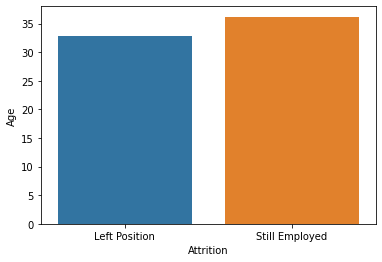

In [20]:
print(df["Age"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "Age", ci = None)

Attrition
Left Position      7.574561
Still Employed    10.359601
Name: TotalWorkingYears, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

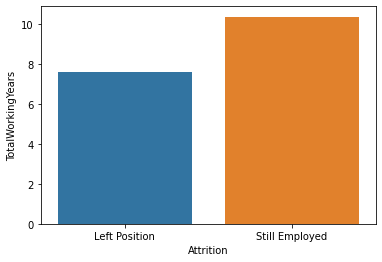

In [21]:

print(df["TotalWorkingYears"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "TotalWorkingYears", ci = None)

Attrition
Left Position     10.815789
Still Employed     9.058877
Name: DistanceFromHome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

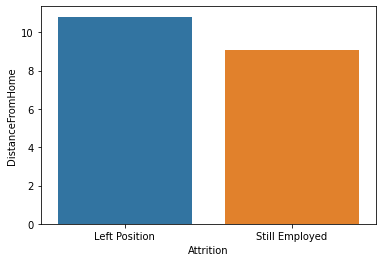

In [22]:
print(df["DistanceFromHome"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "DistanceFromHome", ci = None)

Attrition
Left Position     4438.785088
Still Employed    5673.309783
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

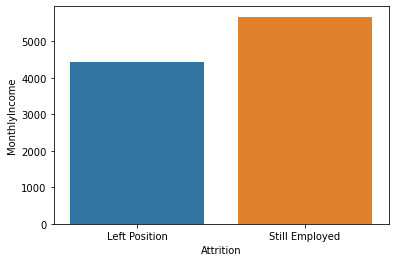

In [23]:
print(df["MonthlyIncome"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "MonthlyIncome", ci = None)

Attrition
Left Position     15.114035
Still Employed    15.265399
Name: PercentSalaryHike, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

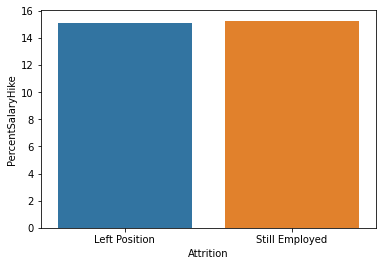

In [24]:

print(df["PercentSalaryHike"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "PercentSalaryHike", ci = None)

Attrition
Left Position     4.605263
Still Employed    6.682065
Name: YearsAtCompany, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

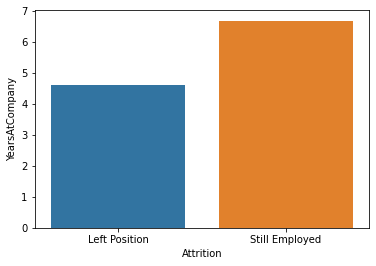

In [25]:

print(df["YearsAtCompany"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "YearsAtCompany", ci = None)


Attrition
Left Position     2.688596
Still Employed    4.288949
Name: YearsInCurrentRole, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

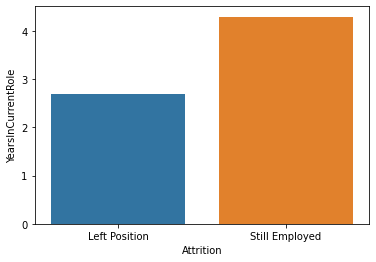

In [26]:

print(df["YearsInCurrentRole"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "YearsInCurrentRole", ci = None)


Attrition
Left Position     1.776316
Still Employed    1.971920
Name: YearsSinceLastPromotion, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

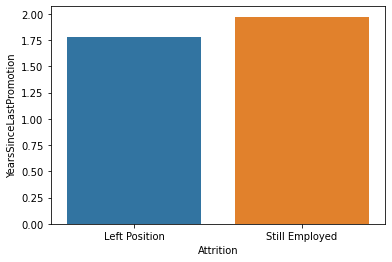

In [27]:

print(df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "YearsSinceLastPromotion", ci = None)


Attrition
Left Position     2.723684
Still Employed    4.173913
Name: YearsWithCurrManager, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

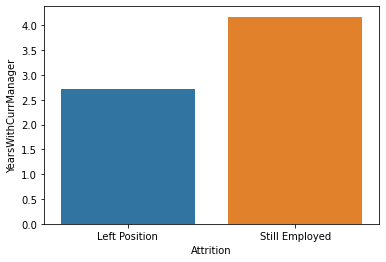

In [28]:

print(df["YearsWithCurrManager"].groupby(df["Attrition"]).mean())

###

sns.barplot(data = df, x = "Attrition", y = "YearsWithCurrManager", ci = None)


### Education Level as an independent variable.

In [29]:
# Percentage of people left their jobs group by education level.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['Education'], 
    normalize = True
).style.format('{:.2%}')

Education,1,2,3,4,5
Attrition,,,,,
Left Position,12.72%,19.30%,41.67%,24.12%,2.19%


In [30]:
# Percentage of people stay at their jobs group by education level.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['Education'], 
    normalize = True
).style.format('{:.2%}')

Education,1,2,3,4,5
Attrition,,,,,
Still Employed,11.68%,19.29%,38.13%,27.45%,3.44%


In [31]:
pd.crosstab(
    df['Attrition'], 
    df['Education'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

Education,1,2,3,4,5,All
Attrition,,,,,,
Left Position,2.18%,3.30%,7.13%,4.13%,0.38%,17.12%
Still Employed,9.68%,15.99%,31.61%,22.75%,2.85%,82.88%
All,11.86%,19.29%,38.74%,26.88%,3.23%,100.00%


Text(0.5, 1.0, 'Attrition by Education')

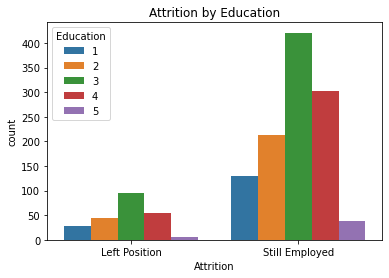

In [32]:

# Counts of people who stay and left their jobs group by educations.
## Visualization
      
sns.countplot(data = df, x = "Attrition", hue = "Education")
plt.title("Attrition by Education")

### Department as an independent variable.

In [33]:
# Percentage of people left their jobs group by Department.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['Department'], 
    normalize = True
).style.format('{:.2%}')

Department,Human Resources,Research & Development,Sales
Attrition,,,
Left Position,5.26%,55.26%,39.47%


In [34]:
# Percentage of people stay at their jobs group by Department.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['Department'], 
    normalize = True
).style.format('{:.2%}')

Department,Human Resources,Research & Development,Sales
Attrition,,,
Still Employed,3.71%,67.12%,29.17%


In [35]:
pd.crosstab(
    df['Attrition'], 
    df['Department'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

Department,Human Resources,Research & Development,Sales,All
Attrition,,,,
Left Position,0.90%,9.46%,6.76%,17.12%
Still Employed,3.08%,55.63%,24.17%,82.88%
All,3.98%,65.09%,30.93%,100.00%


Text(0.5, 1.0, 'Attrition by Department')

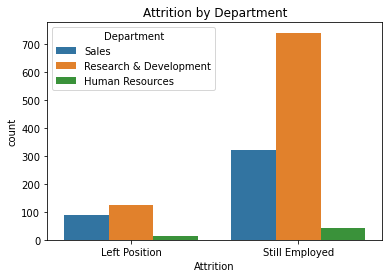

In [36]:
sns.countplot(data = df, x = "Attrition", hue = "Department")
plt.title("Attrition by Department")

### Business Travel as an independent variable.

In [37]:
# Percentage of people left their jobs group by Business Travel.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['BusinessTravel'], 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
Left Position,5.26%,29.82%,64.91%


In [38]:
# Percentage of people stay at their jobs group by Business Travel.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['BusinessTravel'], 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
Still Employed,11.32%,17.21%,71.47%


In [39]:
pd.crosstab(
    df['Attrition'], 
    df['BusinessTravel'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Attrition,,,,
Left Position,0.90%,5.11%,11.11%,17.12%
Still Employed,9.38%,14.26%,59.23%,82.88%
All,10.29%,19.37%,70.35%,100.00%


BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
Left Position     0.900901           5.105105      11.111111
Still Employed    9.384384          14.264264      59.234234


Text(0.5, 1.0, 'Attrition by Business Travel')

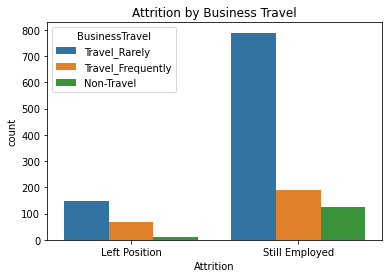

In [40]:
#
print(pd.crosstab(index = df['Attrition'],  \
                      columns = df['BusinessTravel'] , \
                      normalize=True) *100)

sns.countplot(data = df, x = "Attrition", hue = "BusinessTravel")
plt.title("Attrition by Business Travel")

### Education fields as an independent variable.

In [41]:
# Percentage of people left their jobs group by Education fields.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['BusinessTravel'], 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
Left Position,5.26%,29.82%,64.91%


In [42]:
# Percentage of people stay at their jobs group by Education fields.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['BusinessTravel'], 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
Still Employed,11.32%,17.21%,71.47%


In [43]:
pd.crosstab(
    df['Attrition'], 
    df['BusinessTravel'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Attrition,,,,
Left Position,0.90%,5.11%,11.11%,17.12%
Still Employed,9.38%,14.26%,59.23%,82.88%
All,10.29%,19.37%,70.35%,100.00%


Text(0.5, 1.0, 'Attrition by Education Field')

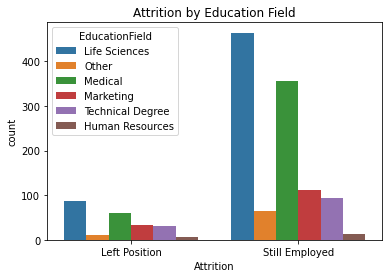

In [44]:

sns.countplot(data = df, x = "Attrition", hue = "EducationField")
plt.title("Attrition by Education Field")

### Environment satisfactions as an independent variable.

In [45]:
# Percentage of people left their jobs group by Environment satisfactions.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['EnvironmentSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
Left Position,30.70%,18.42%,26.75%,24.12%


In [46]:
# Percentage of people stay at their jobs group by Environment satisfactions.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['EnvironmentSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
Still Employed,16.94%,20.02%,31.79%,31.25%


In [47]:
pd.crosstab(
    df['Attrition'], 
    df['EnvironmentSatisfaction'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

EnvironmentSatisfaction,1,2,3,4,All
Attrition,,,,,
Left Position,5.26%,3.15%,4.58%,4.13%,17.12%
Still Employed,14.04%,16.59%,26.35%,25.90%,82.88%
All,19.29%,19.74%,30.93%,30.03%,100.00%


Text(0.5, 1.0, 'Attrition by Environment Satisfaction')

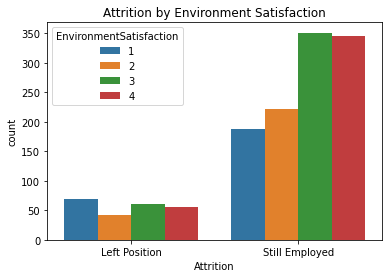

In [48]:

sns.countplot(data = df, x = "Attrition", hue = "EnvironmentSatisfaction")
plt.title("Attrition by Environment Satisfaction")

### Gender as an independent variable.

In [49]:
# Percentage of people left their jobs group by Gender.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['Gender'], 
    normalize = True
).style.format('{:.2%}')

Gender,Female,Male
Attrition,,
Left Position,35.96%,64.04%


In [50]:
# Percentage of people stay at their jobs group by Gender.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['Gender'], 
    normalize = True
).style.format('{:.2%}')

Gender,Female,Male
Attrition,,
Still Employed,41.03%,58.97%


In [51]:
pd.crosstab(
    df['Attrition'], 
    df['Gender'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

Gender,Female,Male,All
Attrition,,,
Left Position,6.16%,10.96%,17.12%
Still Employed,34.01%,48.87%,82.88%
All,40.17%,59.83%,100.00%


Text(0.5, 1.0, 'Attrition by Gender')

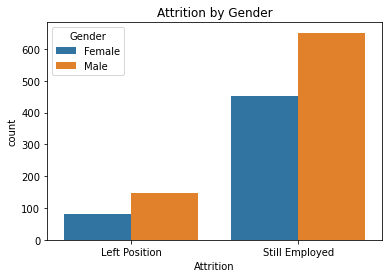

In [52]:

sns.countplot(data = df, x = "Attrition", hue = "Gender")
plt.title("Attrition by Gender")

### Job involvement satisfactions as an independent variable.

In [53]:
# Percentage of people left their jobs group by Job Involvement.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['JobInvolvement'], 
    normalize = True
).style.format('{:.2%}')

JobInvolvement,1,2,3,4
Attrition,,,,
Left Position,11.40%,30.26%,52.63%,5.70%


In [54]:
# Percentage of people stay at their jobs group by Job Involvement.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['JobInvolvement'], 
    normalize = True
).style.format('{:.2%}')

JobInvolvement,1,2,3,4
Attrition,,,,
Still Employed,4.44%,24.55%,60.05%,10.96%


In [55]:
pd.crosstab(
    df['Attrition'], 
    df['JobInvolvement'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

JobInvolvement,1,2,3,4,All
Attrition,,,,,
Left Position,1.95%,5.18%,9.01%,0.98%,17.12%
Still Employed,3.68%,20.35%,49.77%,9.08%,82.88%
All,5.63%,25.53%,58.78%,10.06%,100.00%


Text(0.5, 1.0, 'Attrition by JobInvolvement')

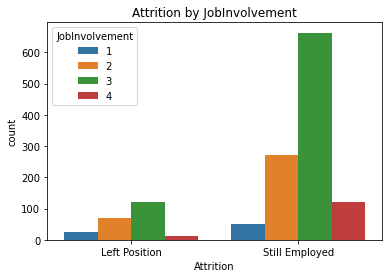

In [56]:

sns.countplot(data = df, x = "Attrition", hue = "JobInvolvement")
plt.title("Attrition by JobInvolvement")

### Environment satisfactions as an independent variable.

In [57]:
# Percentage of people left their jobs group by Job Levels.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['JobLevel'], 
    normalize = True
).style.format('{:.2%}')

JobLevel,1,2,3,4
Attrition,,,,
Left Position,61.84%,22.81%,13.16%,2.19%


In [58]:
# Percentage of people stay at their jobs group by Job Levels.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['JobLevel'], 
    normalize = True
).style.format('{:.2%}')

JobLevel,1,2,3,4
Attrition,,,,
Still Employed,35.78%,43.21%,16.30%,4.71%


In [59]:
pd.crosstab(
    df['Attrition'], 
    df['JobLevel'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

JobLevel,1,2,3,4,All
Attrition,,,,,
Left Position,10.59%,3.90%,2.25%,0.38%,17.12%
Still Employed,29.65%,35.81%,13.51%,3.90%,82.88%
All,40.24%,39.71%,15.77%,4.28%,100.00%


Text(0.5, 1.0, 'Attrition by Job Level')

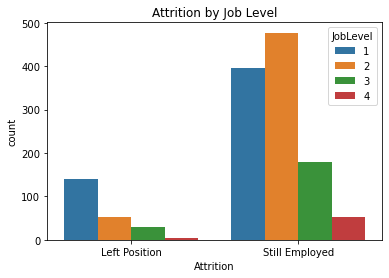

In [60]:

sns.countplot(data = df, x = "Attrition", hue = "JobLevel")
plt.title("Attrition by Job Level")

### Job Roles as an independent variable.

In [61]:
# Percentage of people left their jobs group by Job Roles.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['JobRole'], 
    normalize = True
).style.format('{:.2%}')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,
Left Position,3.51%,5.26%,26.75%,0.88%,3.95%,20.18%,25.00%,14.47%


In [62]:
# Percentage of people stay at their jobs group by Job Roles.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['JobRole'], 
    normalize = True
).style.format('{:.2%}')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
Still Employed,10.78%,3.53%,17.75%,2.17%,12.05%,3.53%,21.92%,23.73%,4.53%


In [63]:
pd.crosstab(
    df['Attrition'], 
    df['JobRole'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,All
Attrition,,,,,,,,,,
Left Position,0.60%,0.90%,4.58%,0.15%,0.68%,0.00%,3.45%,4.28%,2.48%,17.12%
Still Employed,8.93%,2.93%,14.71%,1.80%,9.98%,2.93%,18.17%,19.67%,3.75%,82.88%
All,9.53%,3.83%,19.29%,1.95%,10.66%,2.93%,21.62%,23.95%,6.23%,100.00%


Text(0.5, 1.0, 'Attrition by Job Role')

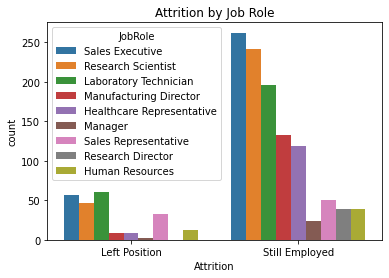

In [64]:

sns.countplot(data = df, x = "Attrition", hue = "JobRole")
plt.title("Attrition by Job Role")

### Job satisfactions as an independent variable.

In [65]:
# Percentage of people left their jobs group by Job satisfactions.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['EnvironmentSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
Left Position,30.70%,18.42%,26.75%,24.12%


In [66]:
# Percentage of people stay at their jobs group by Job satisfactions.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'],
    df['JobSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

JobSatisfaction,1,2,3,4
Attrition,,,,
Still Employed,17.66%,19.11%,29.80%,33.42%


In [67]:
pd.crosstab(
    df['Attrition'], 
    df['JobSatisfaction'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

JobSatisfaction,1,2,3,4,All
Attrition,,,,,
Left Position,4.80%,3.30%,5.33%,3.68%,17.12%
Still Employed,14.64%,15.84%,24.70%,27.70%,82.88%
All,19.44%,19.14%,30.03%,31.38%,100.00%


Text(0.5, 1.0, 'Attrition by Job Satisfaction')

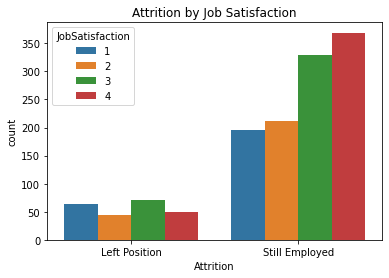

In [68]:

sns.countplot(data = df, x = "Attrition", hue = "JobSatisfaction")
plt.title("Attrition by Job Satisfaction")

### Marital status as an independent variable.

In [69]:
# Percentage of people left their jobs group by Marital status.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['MaritalStatus'], 
    normalize = True
).style.format('{:.2%}')

MaritalStatus,Divorced,Married,Single
Attrition,,,
Left Position,14.04%,34.65%,51.32%


In [70]:
# Percentage of people stay at their jobs group by Marital status.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['MaritalStatus'], 
    normalize = True
).style.format('{:.2%}')

MaritalStatus,Divorced,Married,Single
Attrition,,,
Still Employed,23.73%,47.37%,28.89%


In [71]:
pd.crosstab(
    df['Attrition'], 
    df['MaritalStatus'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
Left Position,2.40%,5.93%,8.78%,17.12%
Still Employed,19.67%,39.26%,23.95%,82.88%
All,22.07%,45.20%,32.73%,100.00%


Text(0.5, 1.0, 'Attrition by Job Marital Status')

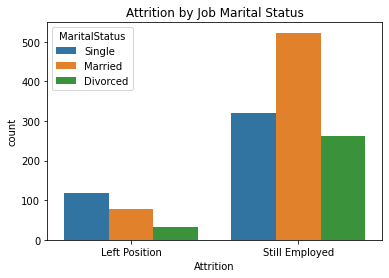

In [72]:

sns.countplot(data = df, x = "Attrition", hue = "MaritalStatus")
plt.title("Attrition by Job Marital Status")

### Number of companies employees worked before as an independent variable.

In [73]:
# Percentage of people left their jobs group by Number of companies employees worked before.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['NumCompaniesWorked'], 
    normalize = True
).style.format('{:.2%}')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
Left Position,10.09%,41.67%,6.58%,7.02%,7.02%,6.58%,7.02%,6.58%,2.63%,4.82%


In [74]:
# Percentage of people stay at their jobs group by Number of companies employees worked before.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['NumCompaniesWorked'], 
    normalize = True
).style.format('{:.2%}')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
Still Employed,14.67%,36.14%,10.51%,10.69%,9.33%,3.71%,4.17%,4.35%,3.26%,3.17%


In [75]:
pd.crosstab(
    df['Attrition'], 
    df['NumCompaniesWorked'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9,All
Attrition,,,,,,,,,,,
Left Position,1.73%,7.13%,1.13%,1.20%,1.20%,1.13%,1.20%,1.13%,0.45%,0.83%,17.12%
Still Employed,12.16%,29.95%,8.71%,8.86%,7.73%,3.08%,3.45%,3.60%,2.70%,2.63%,82.88%
All,13.89%,37.09%,9.83%,10.06%,8.93%,4.20%,4.65%,4.73%,3.15%,3.45%,100.00%


Text(0.5, 1.0, 'Attrition by Numner of Companies Worked')

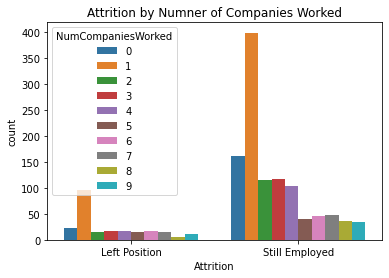

In [76]:

sns.countplot(data = df, x = "Attrition", hue = "NumCompaniesWorked")
plt.title("Attrition by Numner of Companies Worked")

### Over18 as an independent variable.

In [77]:
pd.crosstab(
    df['Attrition'], 
    df['Over18'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

Over18,Y,All
Attrition,,
Left Position,17.12%,17.12%
Still Employed,82.88%,82.88%
All,100.00%,100.00%


Text(0.5, 1.0, 'Attrition by Age of Over 18')

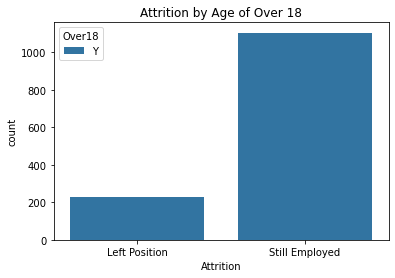

In [78]:

sns.countplot(data = df, x = "Attrition", hue = "Over18")
plt.title("Attrition by Age of Over 18")

### OverTime as an independent variable.

In [79]:
# Percentage of people left their jobs group by OverTime.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['OverTime'], 
    normalize = True
).style.format('{:.2%}')

OverTime,No,Yes
Attrition,,
Left Position,46.49%,53.51%


In [80]:
# Percentage of people stay at their jobs group by OverTime.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['OverTime'], 
    normalize = True
).style.format('{:.2%}')

OverTime,No,Yes
Attrition,,
Still Employed,76.99%,23.01%


In [81]:
pd.crosstab(
    df['Attrition'], 
    df['OverTime'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

OverTime,No,Yes,All
Attrition,,,
Left Position,7.96%,9.16%,17.12%
Still Employed,63.81%,19.07%,82.88%
All,71.77%,28.23%,100.00%


Text(0.5, 1.0, 'Attrition by OverTime Worked')

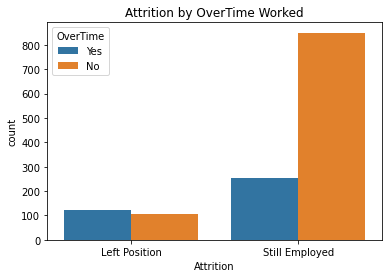

In [82]:

sns.countplot(data = df, x = "Attrition", hue = "OverTime")
plt.title("Attrition by OverTime Worked")

### Environment satisfactions as an independent variable.

In [83]:
# Percentage of people left their jobs group by Performance Rating.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['PerformanceRating'], 
    normalize = True
).style.format('{:.2%}')

PerformanceRating,3,4
Attrition,,
Left Position,84.21%,15.79%


In [84]:
# Percentage of people stay at their jobs group by Performance Rating.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['PerformanceRating'], 
    normalize = True
).style.format('{:.2%}')

PerformanceRating,3,4
Attrition,,
Still Employed,84.69%,15.31%


In [85]:
pd.crosstab(
    df['Attrition'], 
    df['PerformanceRating'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

PerformanceRating,3,4,All
Attrition,,,
Left Position,14.41%,2.70%,17.12%
Still Employed,70.20%,12.69%,82.88%
All,84.61%,15.39%,100.00%


Text(0.5, 1.0, 'Attrition by Performance Rating')

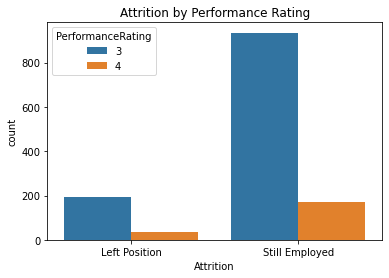

In [86]:
#Employee performance at current position; 1 = low, 
#2 = good, 3 = excellent, 4 = outstanding

sns.countplot(data = df, x = "Attrition", hue = "PerformanceRating")
plt.title("Attrition by Performance Rating")

### Relationship Satisfaction as an independent variable.

In [87]:
# Percentage of people left their jobs group by Relationship Satisfaction.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['RelationshipSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
Left Position,24.12%,19.74%,31.14%,25.00%


In [88]:
# Percentage of people stay at their jobs group by Relationship Satisfaction.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['RelationshipSatisfaction'], 
    normalize = True
).style.format('{:.2%}')

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
Still Employed,18.12%,20.83%,31.97%,29.08%


In [89]:
pd.crosstab(
    df['Attrition'], 
    df['RelationshipSatisfaction'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

RelationshipSatisfaction,1,2,3,4,All
Attrition,,,,,
Left Position,4.13%,3.38%,5.33%,4.28%,17.12%
Still Employed,15.02%,17.27%,26.50%,24.10%,82.88%
All,19.14%,20.65%,31.83%,28.38%,100.00%


Text(0.5, 1.0, 'Attrition by Relationship Satisfaction')

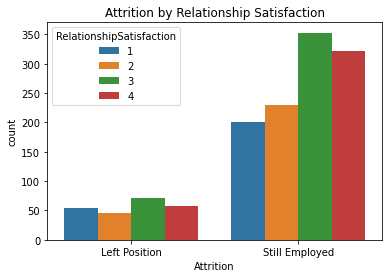

In [90]:
#Employee satisfaction with job-related relationships, 1 =low, 2 = medium, 3 = high, 4 = very high

sns.countplot(data = df, x = "Attrition", hue = "RelationshipSatisfaction")
plt.title("Attrition by Relationship Satisfaction")

### Stock Option Level as an independent variable.

In [91]:
# Percentage of people left their jobs group by Stock Option Level.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['StockOptionLevel'], 
    normalize = True
).style.format('{:.2%}')

StockOptionLevel,0,1,2,3
Attrition,,,,
Left Position,65.35%,22.81%,5.26%,6.58%


In [92]:
# Percentage of people stay at their jobs group by Stock Option Level.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['StockOptionLevel'], 
    normalize = True
).style.format('{:.2%}')

StockOptionLevel,0,1,2,3
Attrition,,,,
Still Employed,38.59%,43.03%,12.41%,5.98%


In [93]:
pd.crosstab(
    df['Attrition'], 
    df['StockOptionLevel'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

StockOptionLevel,0,1,2,3,All
Attrition,,,,,
Left Position,11.19%,3.90%,0.90%,1.13%,17.12%
Still Employed,31.98%,35.66%,10.29%,4.95%,82.88%
All,43.17%,39.56%,11.19%,6.08%,100.00%


Text(0.5, 1.0, 'Attrition by Stock Option Level')

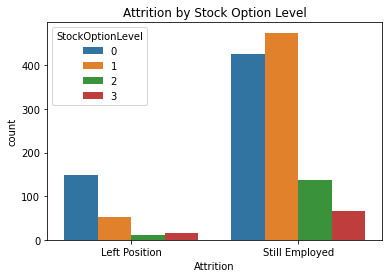

In [94]:

sns.countplot(data = df, x = "Attrition", hue = "StockOptionLevel")
plt.title("Attrition by Stock Option Level")

### Training Times Last Year as an independent variable.

In [95]:
# Percentage of people left their jobs group by Training Times Last Year.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['TrainingTimesLastYear'], 
    normalize = True
).style.format('{:.2%}')

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
Left Position,5.70%,3.95%,41.67%,28.95%,10.96%,6.14%,2.63%


In [96]:
# Percentage of people stay at their jobs group by Training Times Last Year.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['TrainingTimesLastYear'], 
    normalize = True
).style.format('{:.2%}')

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition,,,,,,,
Still Employed,3.26%,5.07%,36.32%,34.24%,7.79%,8.33%,4.98%


In [97]:
pd.crosstab(
    df['Attrition'], 
    df['TrainingTimesLastYear'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

TrainingTimesLastYear,0,1,2,3,4,5,6,All
Attrition,,,,,,,,
Left Position,0.98%,0.68%,7.13%,4.95%,1.88%,1.05%,0.45%,17.12%
Still Employed,2.70%,4.20%,30.11%,28.38%,6.46%,6.91%,4.13%,82.88%
All,3.68%,4.88%,37.24%,33.33%,8.33%,7.96%,4.58%,100.00%


Text(0.5, 1.0, 'Attrition by Training Times Last Year')

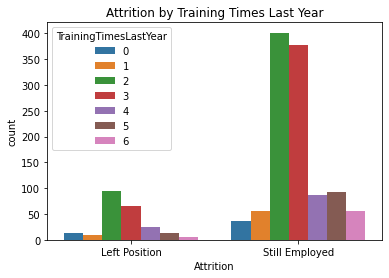

In [98]:

sns.countplot(data = df, x = "Attrition", hue = "TrainingTimesLastYear")
plt.title("Attrition by Training Times Last Year")

### Work Life Balance as an independent variable.

In [99]:
# Percentage of people left their jobs group by Work Life Balance.
df1 = df[df['Attrition'] == 'Left Position']

pd.crosstab(
    df1['Attrition'], 
    df['WorkLifeBalance'], 
    normalize = True
).style.format('{:.2%}')

WorkLifeBalance,1,2,3,4
Attrition,,,,
Left Position,10.96%,24.12%,53.07%,11.84%


In [100]:
# Percentage of people stay at their jobs group by Work Life Balance.

df1 = df[df['Attrition'] == 'Still Employed']

pd.crosstab(
    df1['Attrition'], 
    df['WorkLifeBalance'], 
    normalize = True
).style.format('{:.2%}')

WorkLifeBalance,1,2,3,4
Attrition,,,,
Still Employed,4.62%,22.55%,62.77%,10.05%


In [101]:
pd.crosstab(
    df['Attrition'], 
    df['WorkLifeBalance'], 
    margins = True, 
    normalize = True
).style.format('{:.2%}')

WorkLifeBalance,1,2,3,4,All
Attrition,,,,,
Left Position,1.88%,4.13%,9.08%,2.03%,17.12%
Still Employed,3.83%,18.69%,52.03%,8.33%,82.88%
All,5.71%,22.82%,61.11%,10.36%,100.00%


Text(0.5, 1.0, 'Attrition by Work Life Balance')

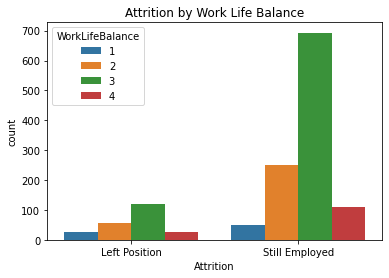

In [102]:

sns.countplot(data = df, x = "Attrition", hue = "WorkLifeBalance")
plt.title("Attrition by Work Life Balance")

## Logistic Regression Model

In [114]:
df["Attrition"].replace(["Left Position","Still Employed"],[1,0], inplace = True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:>

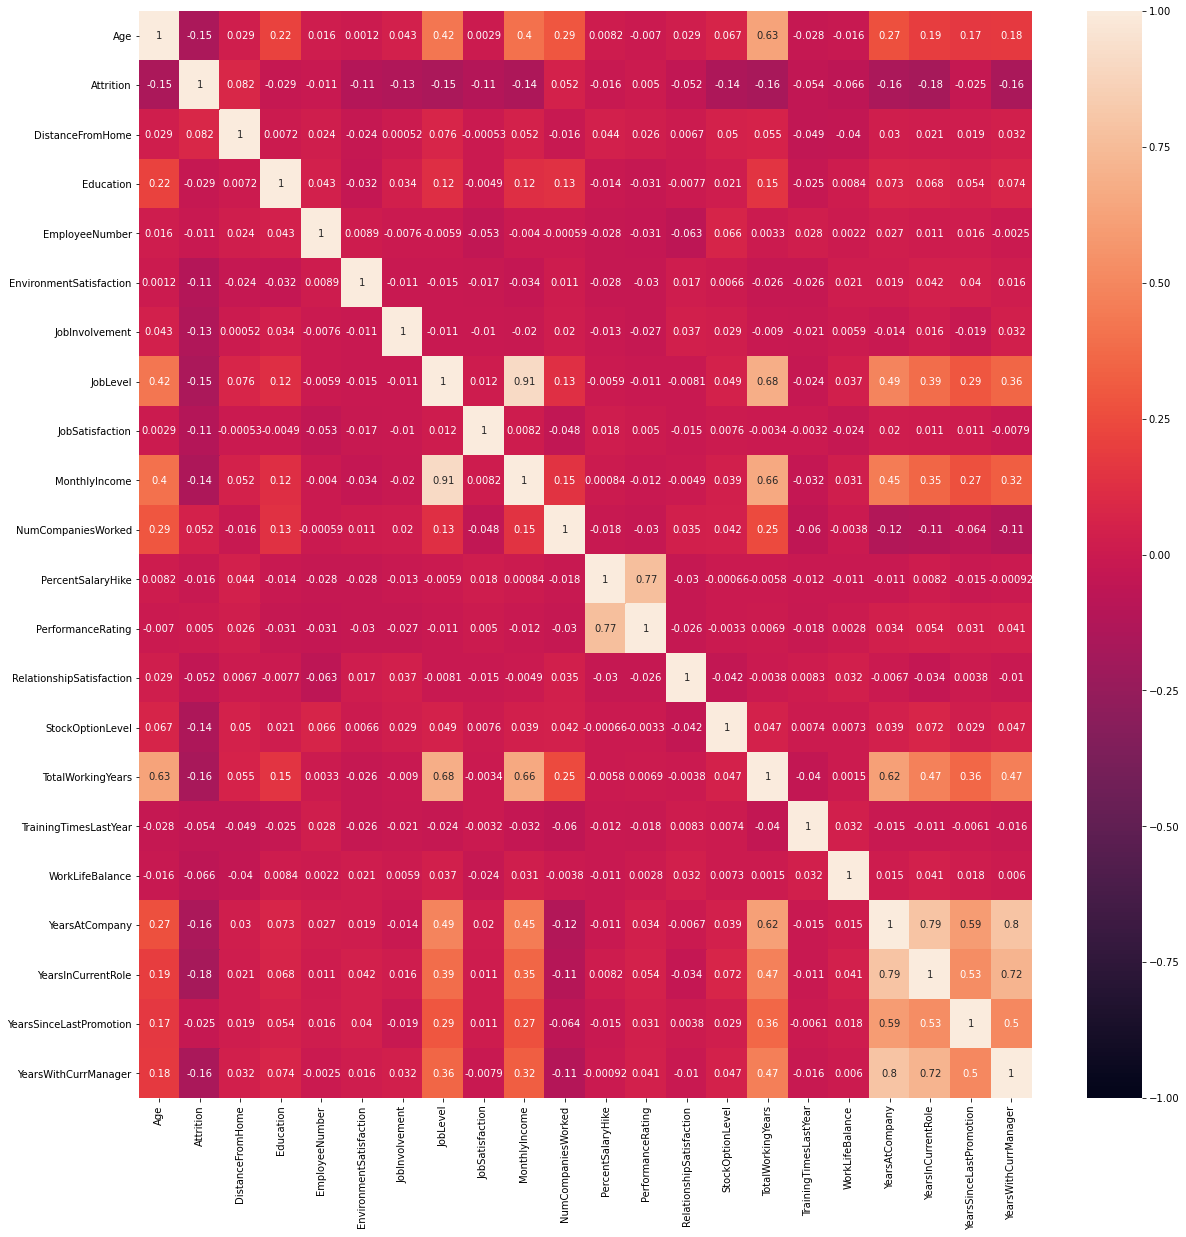

In [115]:
# show correlation of stats via heatmap
plt.figure(figsize=(20,20))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [116]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('Attrition ~ C(BusinessTravel) + C(OverTime) + C(Over18) + C(MaritalStatus) + C(EducationField) + C(Gender) + C(JobRole) + C(Department) + PercentSalaryHike + Age + DistanceFromHome + Education + EmployeeNumber + EnvironmentSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + JobInvolvement + JobLevel + JobSatisfaction + MonthlyIncome + NumCompaniesWorked + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=df).fit()

mod1.summary()

         Current function value: 0.294423
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1332
Model:                          Logit   Df Residuals:                     1289
Method:                           MLE   Df Model:                           42
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.3568
Time:                        02:36:23   Log-Likelihood:                -392.17
converged:                      False   LL-Null:                       -609.71
Covariance Type:            nonrobust   LLR p-value:                 8.536e-67
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -12.6590   4036.493     -0.003      0.997   -7924.041    7898.723
C(BusinessTravel)[T.Travel_Frequently]      2.0789      0.430      4.839      0.000       1.237       2.921
C(BusinessTravel)[T.Travel_Rarely]          1.0481      0.394      2.662      0.008       0.276       1.820
C(OverTime)[T.Yes]                          2.0525      0.204     10.046      0.000       1.652       2.453
C(MaritalStatus)[T.Married]                 0.2438      0.277      0.882      0.378      -0.298       0.786
C(MaritalStatus)[T.Single]                  1.2028      0.360      3.344      0.001       0.498       1.908
C(EducationField)[T.Life Sciences]         -0.7561      0.824     -0.918      0.359      -2.371       0.859
C(EducationField)[T.Marketing]             -0.4421      0.877     -0.504      0.614      -2.160       1.276
C(EducationField)[T.Medical]               -0.8751      0.824     -1.062      0.288      -2.491       0.741
C(EducationField)[T.Other]                 -0.7905      0.880     -0.898      0.369      -2.516       0.935
C(EducationField)[T.Technical Degree]       0.0533      0.842      0.063      0.950      -1.597       1.703
C(Gender)[T.Male]                           0.4620      0.194      2.378      0.017       0.081       0.843
C(JobRole)[T.Human Resources]              16.7800   4036.493      0.004      0.997   -7894.601    7928.161
C(JobRole)[T.Laboratory Technician]         1.5332      0.516      2.969      0.003       0.521       2.545
C(JobRole)[T.Manager]                       1.5575      1.063      1.466      0.143      -0.525       3.640
C(JobRole)[T.Manufacturing Director]        0.3318      0.566      0.586      0.558      -0.777       1.441
C(JobRole)[T.Research Director]           -19.5151   8151.552     -0.002      0.998    -1.6e+04     1.6e+04
C(JobRole)[T.Research Scientist]            0.5797      0.529      1.096      0.273      -0.457       1.616
C(JobRole)[T.Sales Executive]             212.9665   9.41e+06   2.26e-05      1.000   -1.84e+07    1.84e+07
C(JobRole)[T.Sales Representative]        213.7748   9.41e+06   2.27e-05      1.000   -1.84e+07    1.84e+07
C(Department)[T.Research & Development]    15.3164   4036.493      0.004      0.997   -7896.064    7926.697
C(Department)[T.Sales]                   -196.3975   9.41e+06  -2.09e-05      1.000   -1.84e+07    1.84e+07
PercentSalaryHike                          -0.0248      0.041     -0.608      0.543      -0.105       0.055
Age                                        -0.0358      0.015     -2.410      0.016      -0.065      -0.007
DistanceFromHome                            0.0522      0.011      4.619      0.000       0.030       0.074
Education                                   0.0305      0.092      0.330      0.742      -0.151       0.212
EmployeeNumber                             -0.0002      0.000     -0.997      0.319      -0.000       0.000
E

In [117]:
## print just the variable coefficient values

mod1.params

Intercept                                  -12.659043
C(BusinessTravel)[T.Travel_Frequently]       2.078925
C(BusinessTravel)[T.Travel_Rarely]           1.048116
C(OverTime)[T.Yes]                           2.052524
C(MaritalStatus)[T.Married]                  0.243777
C(MaritalStatus)[T.Single]                   1.202834
C(EducationField)[T.Life Sciences]          -0.756076
C(EducationField)[T.Marketing]              -0.442127
C(EducationField)[T.Medical]                -0.875082
C(EducationField)[T.Other]                  -0.790482
C(EducationField)[T.Technical Degree]        0.053256
C(Gender)[T.Male]                            0.461969
C(JobRole)[T.Human Resources]               16.780021
C(JobRole)[T.Laboratory Technician]          1.533188
C(JobRole)[T.Manager]                        1.557453
C(JobRole)[T.Manufacturing Director]         0.331844
C(JobRole)[T.Research Director]            -19.515120
C(JobRole)[T.Research Scientist]             0.579749
C(JobRole)[T.Sales Executive

In [118]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,3.178685e-06,9.974977e-01,Not Sig
C(BusinessTravel)[T.Travel_Frequently],7.995872e+00,1.305701e-06,Sig
C(BusinessTravel)[T.Travel_Rarely],2.852272e+00,7.770630e-03,Sig
C(OverTime)[T.Yes],7.787535e+00,9.608143e-24,Sig
C(MaritalStatus)[T.Married],1.276060e+00,3.780149e-01,Not Sig
C(MaritalStatus)[T.Single],3.329539e+00,8.264068e-04,Sig
C(EducationField)[T.Life Sciences],4.695050e-01,3.588092e-01,Not Sig
C(EducationField)[T.Marketing],6.426679e-01,6.139747e-01,Not Sig
C(EducationField)[T.Medical],4.168278e-01,2.884230e-01,Not Sig
C(EducationField)[T.Other],4.536259e-01,3.692743e-01,Not Sig


## Model Adjusted

In [108]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('Attrition ~ C(BusinessTravel) + C(OverTime) + C(Over18) + C(Gender) + Age + DistanceFromHome + EnvironmentSatisfaction + JobInvolvement + JobSatisfaction + JobInvolvement + JobSatisfaction + NumCompaniesWorked + MonthlyIncome + RelationshipSatisfaction + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.334286
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1332
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.2697
Time:                        02:28:07   Log-Likelihood:                -445.27
converged:                       True   LL-Null:                       -609.71
Covariance Type:            nonrobust   LLR p-value:                 2.330e-58
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.5943      0.807      4.455      0.000       2.013       5.176
C(BusinessTravel)[T.Travel_Frequently]     1.9022      0.397      4.788      0.000       1.124       2.681
C(BusinessTravel)[T.Travel_Rarely]         0.9240      0.368      2.511      0.012       0.203       1.645
C(OverTime)[T.Yes]                         1.8000      0.184      9.800      0.000       1.440       2.160
C(Gender)[T.Male]                          0.3822      0.179      2.135      0.033       0.031       0.733
Age                                       -0.0395      0.014     -2.840      0.005      -0.067      -0.012
DistanceFromHome                           0.0401      0.010      3.913      0.000       0.020       0.060
EnvironmentSatisfaction                   -0.4293      0.079     -5.404      0.000      -0.585      -0.274
JobInvolvement                            -0.5748      0.118     -4.887      0.000      -0.805      -0.344
JobSatisfaction                           -0.4189      0.079     -5.321      0.000      -0.573      -0.265
NumCompaniesWorked                         0.1785      0.037      4.769      0.000       0.105       0.252
MonthlyIncome                          -6.816e-05   4.05e-05     -1.681      0.093      -0.000    1.13e-05
RelationshipSatisfaction                  -0.2544      0.080     -3.165      0.002      -0.412      -0.097
TotalWorkingYears                         -0.0805      0.029     -2.757      0.006      -0.138      -0.023
TrainingTimesLastYear                     -0.1155      0.069     -1.674      0.094      -0.251       0.020
WorkLifeBalance                           -0.2620      0.117     -2.249      0.025      -0.490      -0.034
YearsAtCompany                             0.0459      0.044      1.034      0.301      -0.041       0.133
YearsInCurrentRole                        -0.1587      0.047     -3.409      0.001      -0.250      -0.067
YearsSinceLastPromotion                    0.1936      0.043      4.489      0.000       0.109       0.278
YearsWithCurrManager                      -0.0845      0.050     -1.691      0.091      -0.182       0.013
==========================================================================================================
"""

In [109]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,3.178685e-06,9.974977e-01,Not Sig,-9.999968e+01
C(BusinessTravel)[T.Travel_Frequently],7.995872e+00,1.305701e-06,Sig,6.995872e+02
C(BusinessTravel)[T.Travel_Rarely],2.852272e+00,7.770630e-03,Sig,1.852272e+02
C(OverTime)[T.Yes],7.787535e+00,9.608143e-24,Sig,6.787535e+02
C(MaritalStatus)[T.Married],1.276060e+00,3.780149e-01,Not Sig,2.760600e+01
C(MaritalStatus)[T.Single],3.329539e+00,8.264068e-04,Sig,2.329539e+02
C(EducationField)[T.Life Sciences],4.695050e-01,3.588092e-01,Not Sig,-5.304950e+01
C(EducationField)[T.Marketing],6.426679e-01,6.139747e-01,Not Sig,-3.573321e+01
C(EducationField)[T.Medical],4.168278e-01,2.884230e-01,Not Sig,-5.831722e+01
C(EducationField)[T.Other],4.536259e-01,3.692743e-01,Not Sig,-5.463741e+01


## Prediction

#### Scenario: An over 18 years old male employee who rarely travel in his position, usually works over time at the age of 45. Driving time from home to his work place is about 8 miles. The environment satisfaction is medium. Job involvement level and job satisfaction are high. He has been with 4 companies before, and his income is about 4,787 US dollar per month. His relationship satisfaction is measured to be medium. He has been working for 8 years in his life, and he wasn't trained last year. His work life balance is considered to be bad. He has been with the company for 2 years as well as the year he has held his position at. He wasn't promoted anytime since he has been in his position. His manager has been with him since he got the position.

In [110]:
mod1.predict({
    'BusinessTravel': 'Travel_Rarely', 
    'OverTime': 'Yes', 
    'Over18': 'Y', 
    'Gender': 'Male', 
    'Age': 45, 
    'DistanceFromHome': 8, 
    'EnvironmentSatisfaction': 2, 
    'JobInvolvement': 3,
    'JobSatisfaction': 3, 
    'NumCompaniesWorked': 4, 
    'MonthlyIncome': 4787, 
    'RelationshipSatisfaction': 2, 
    'TotalWorkingYears': 8, 
    'TrainingTimesLastYear': 0,
    'WorkLifeBalance': 1, 
    'YearsAtCompany': 2, 
    'YearsInCurrentRole': 2, 
    'YearsSinceLastPromotion': 0, 
    'YearsWithCurrManager': 2})

## the probability of employees leaving is 49%. 
## if probability is greater than 50% > we classify this individual as having the outcome

0    0.495426
dtype: float64

# Visualization

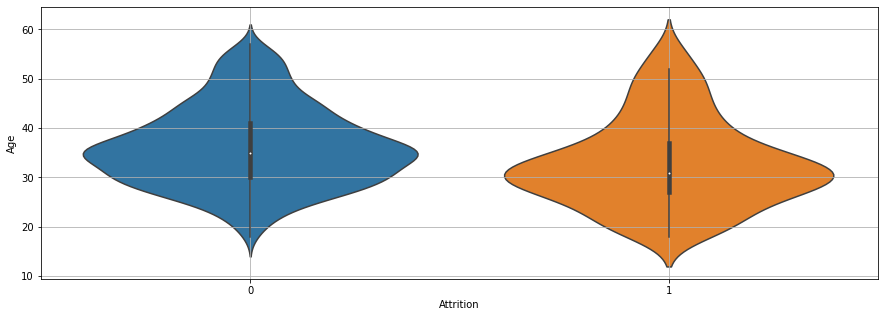

In [111]:
### create a series of violin plots to show the distribution of attack across groups

plt.figure(figsize=(15,5))

sns.violinplot(x = df["Attrition"], y = df["Age"])

plt.grid()

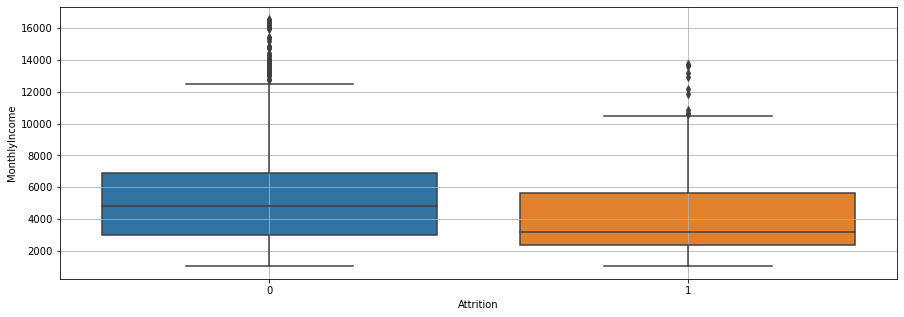

In [112]:
### creating a series of boxplots to show the distribution of attack across groups

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.boxplot(x = df["Attrition"], y = df["MonthlyIncome"])

plt.grid() # add grid lines to plot

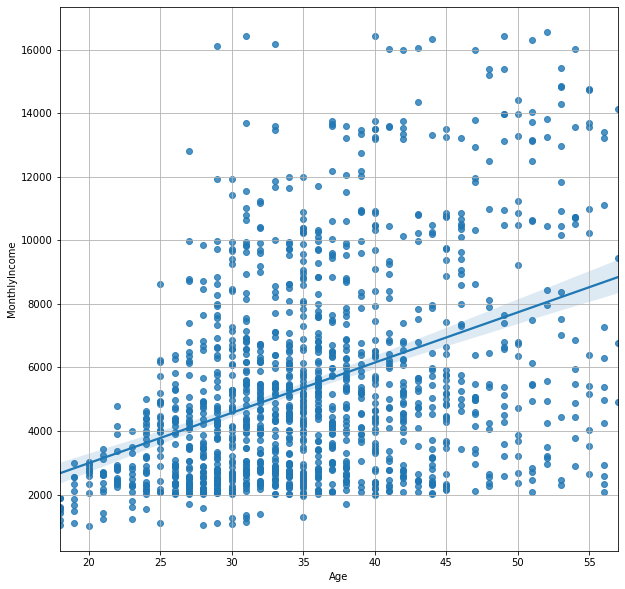

In [113]:
### create a scatterplot to show the linear relationship between attack and defense; with regression line

plt.figure(figsize=(10,10))

sns.regplot(x = df["Age"], y = df["MonthlyIncome"], fit_reg = True)

plt.grid()

## Conclusion

### From the visualization, we can see that on average, younger people left their jobs more than older people, and younger people also get pay less than older people. Income could be the reason people are leaving their jobs for.